# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 


df = pd.DataFrame(X, columns=online_shoppers_purchasing_intention_dataset.data.feature_names)
df = df.dropna().select_dtypes(include=[np.number])

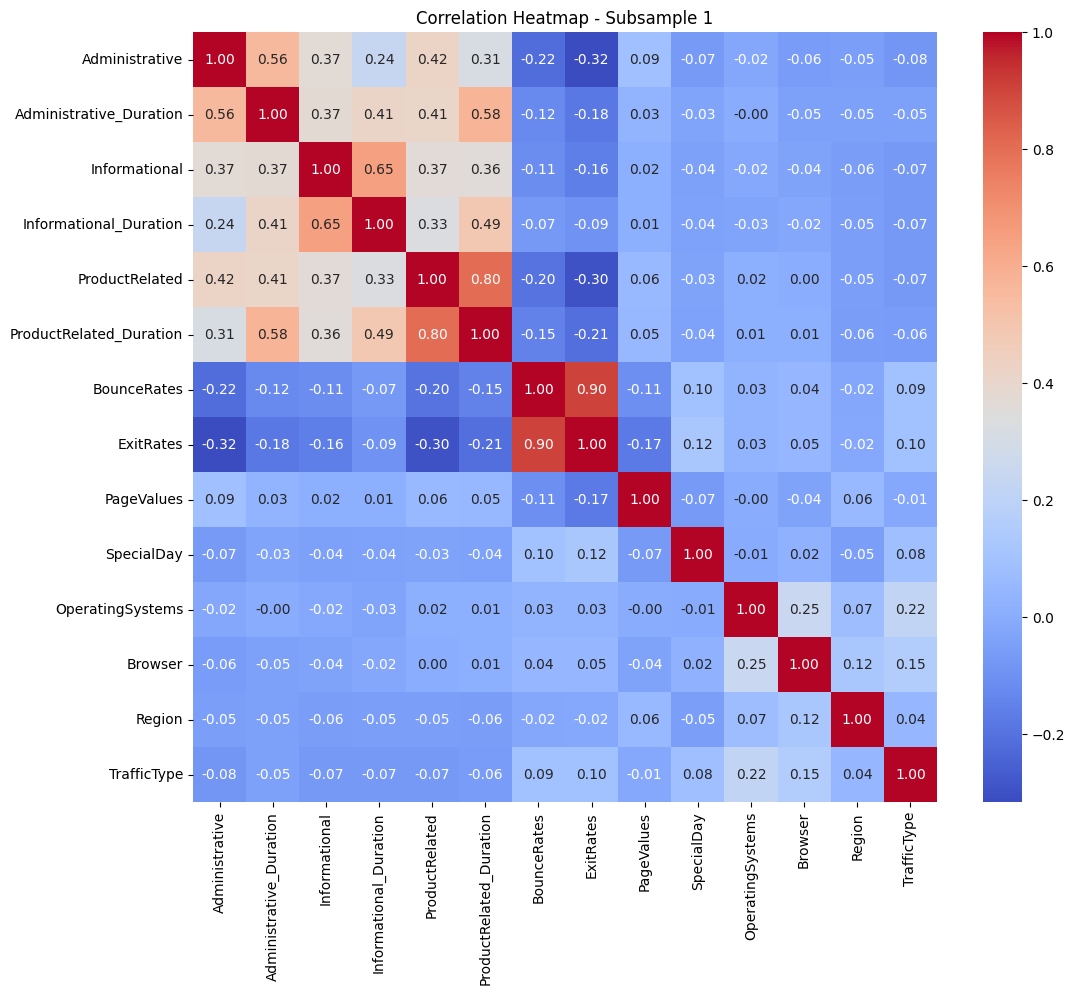

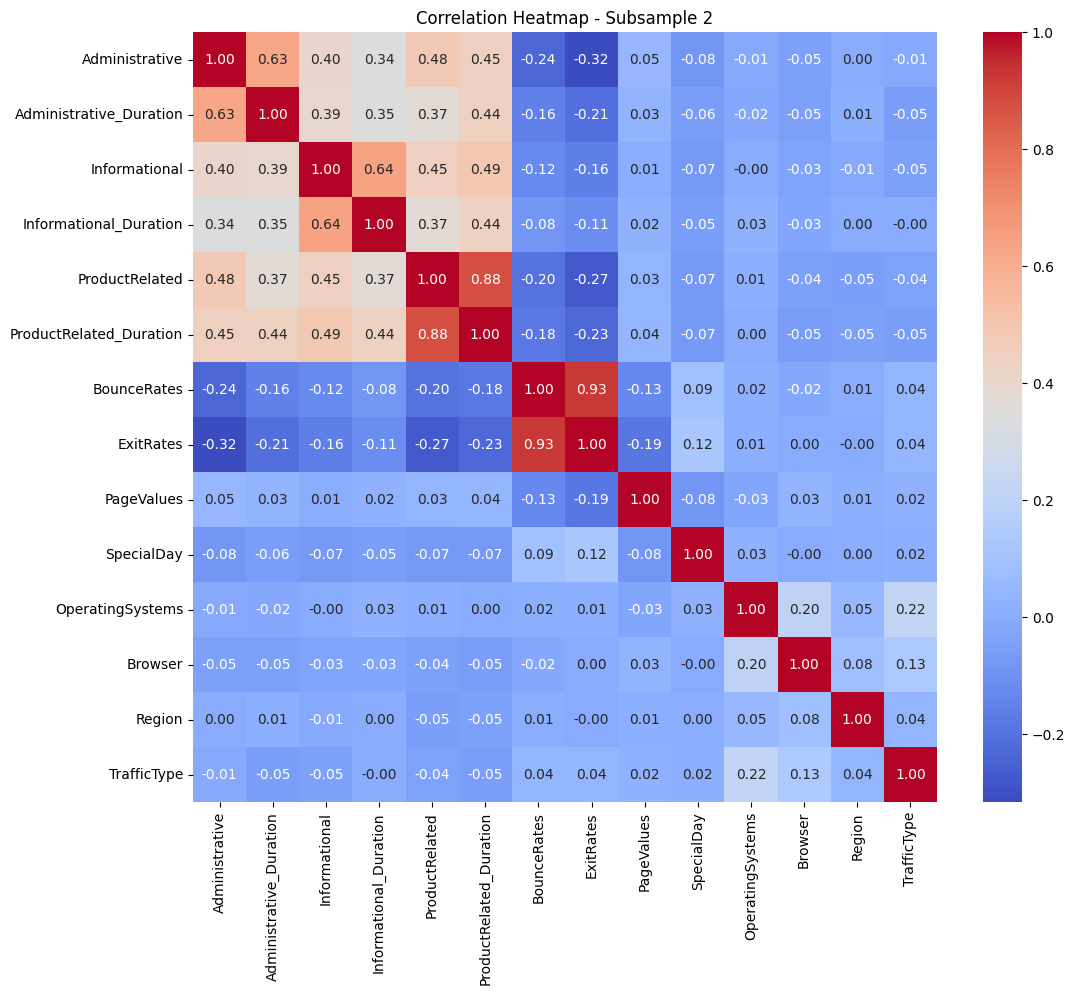

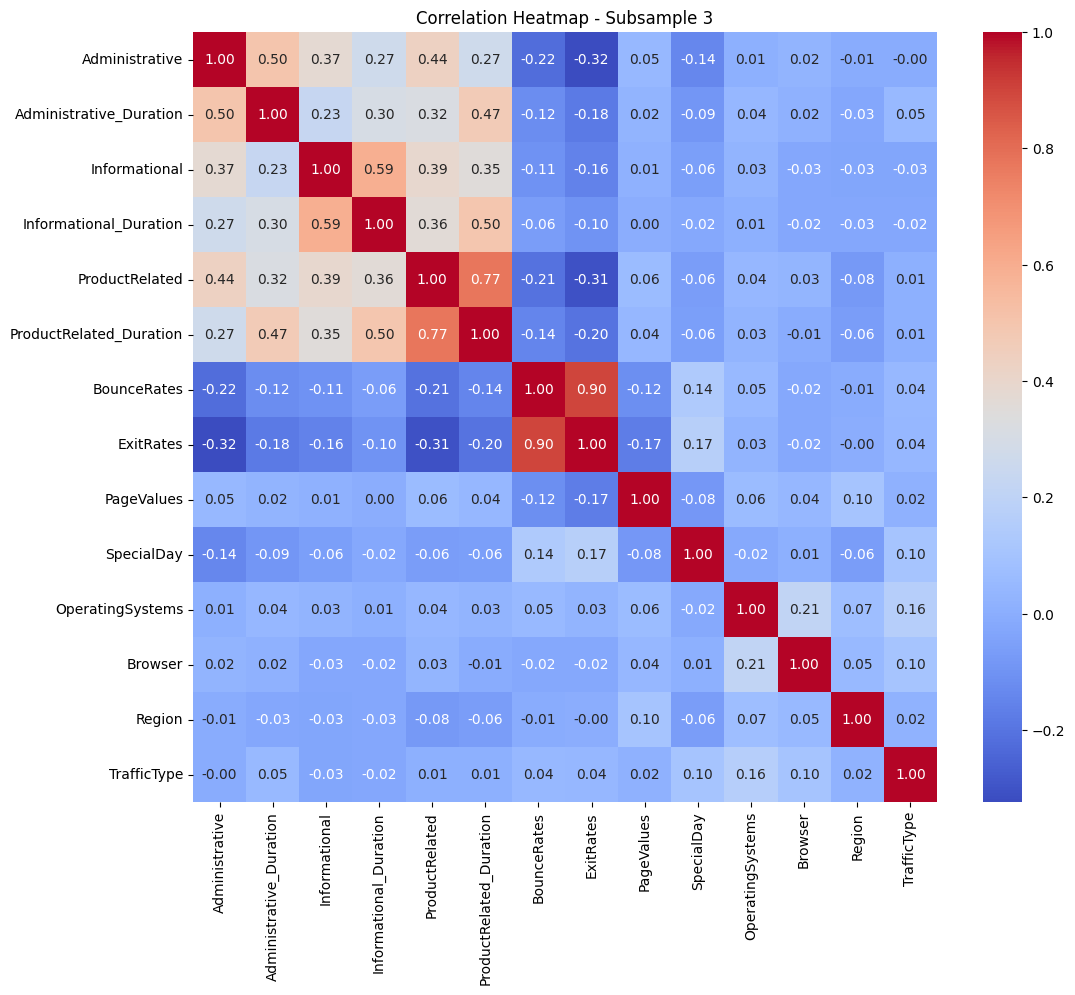

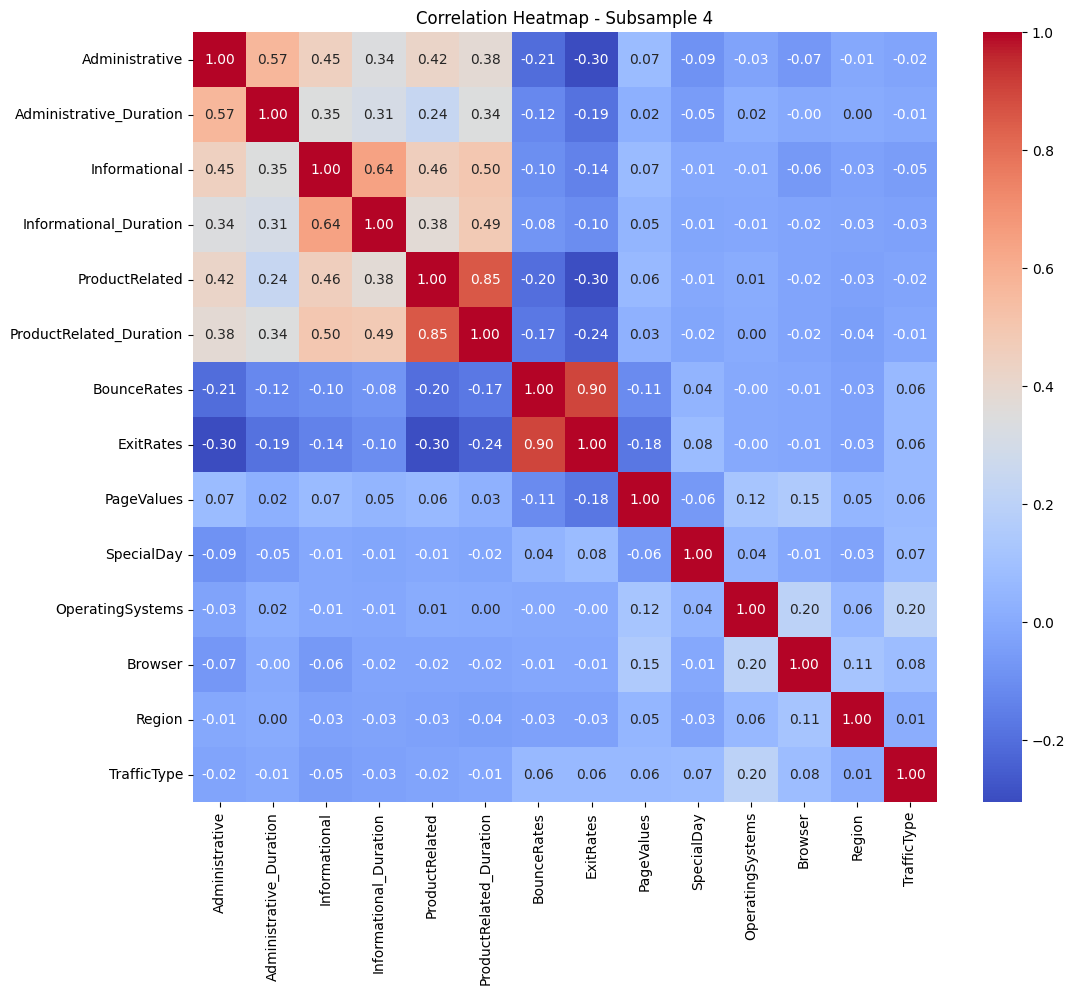

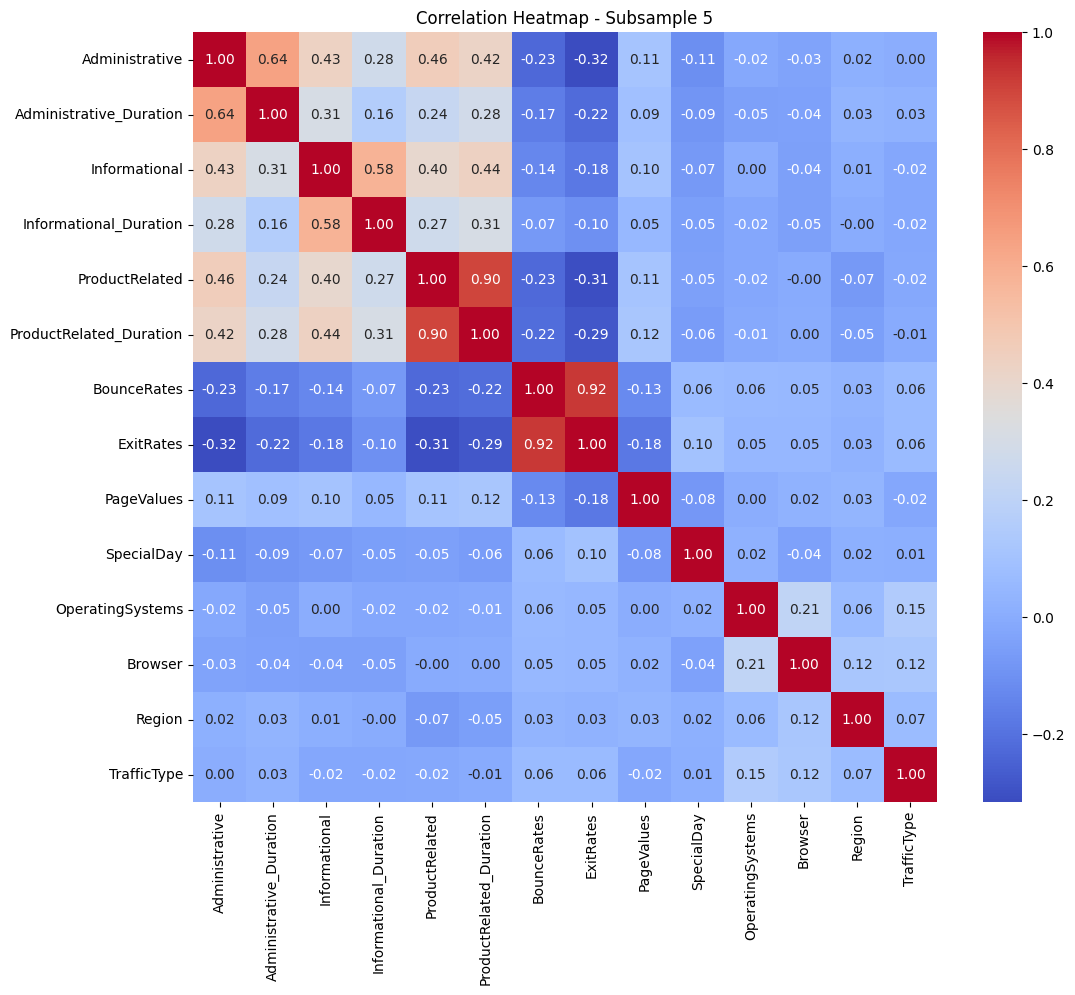

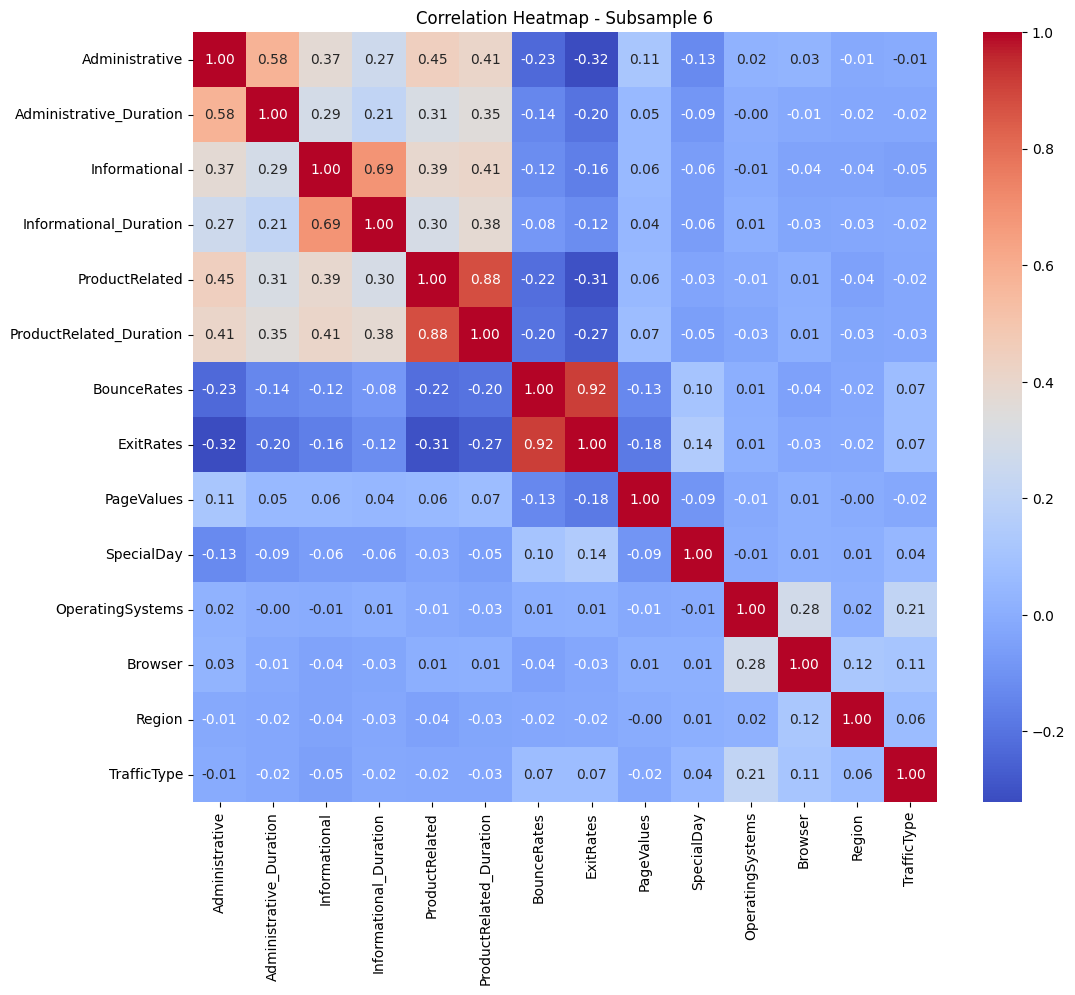

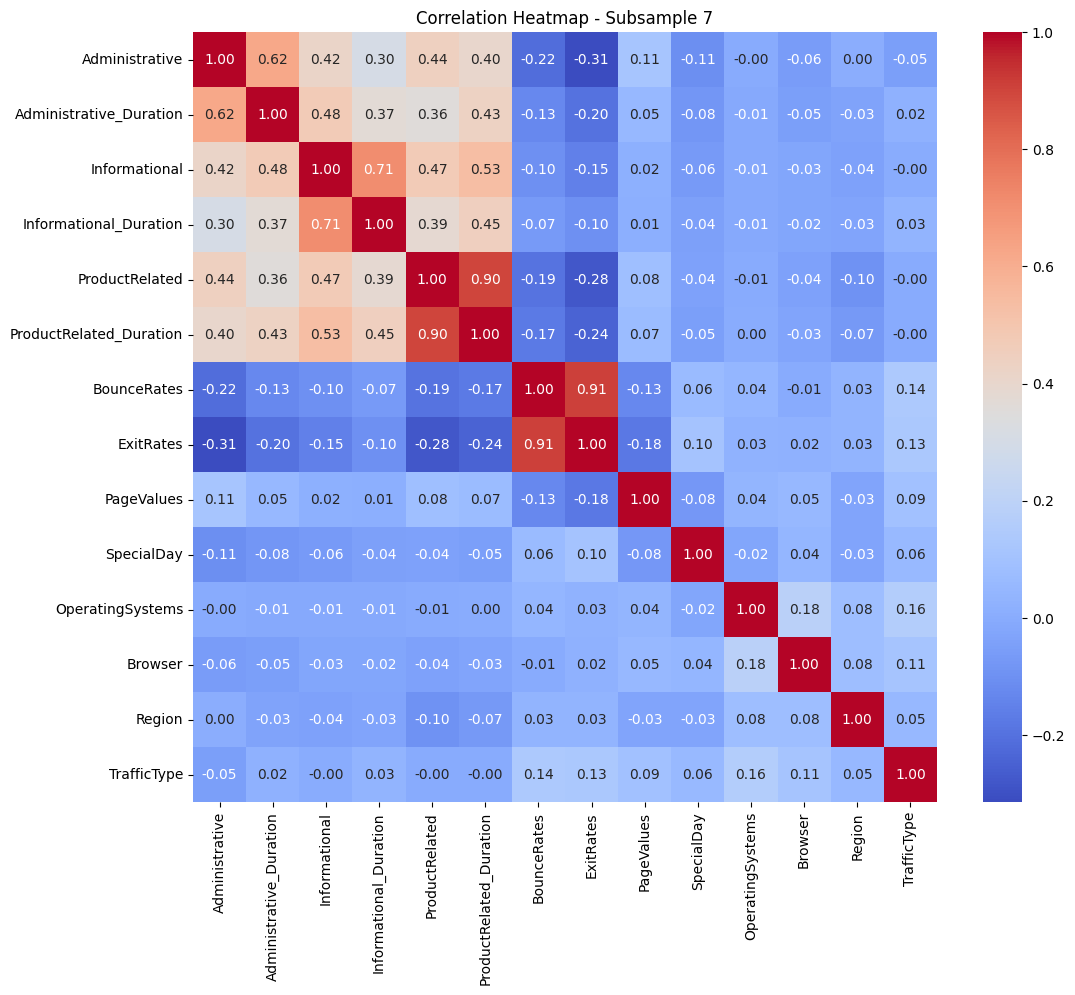

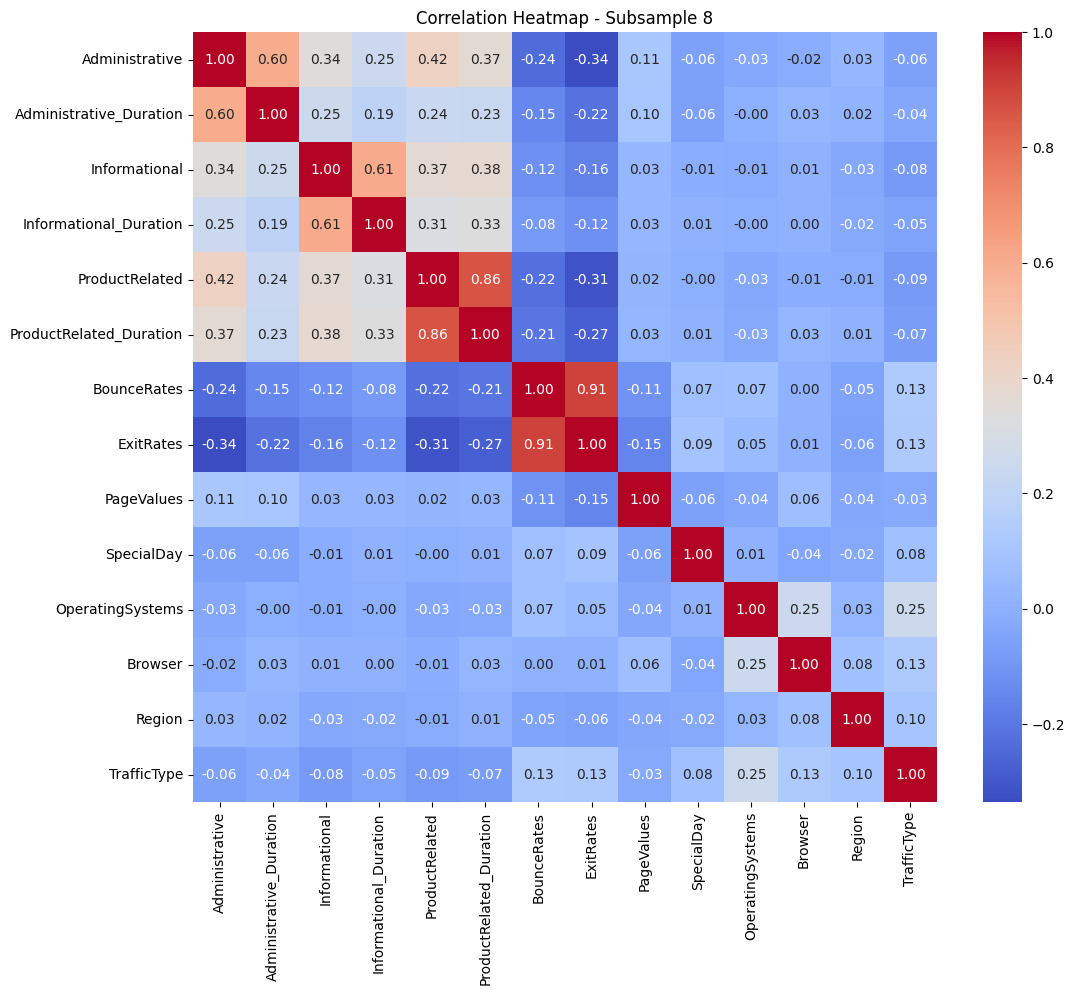

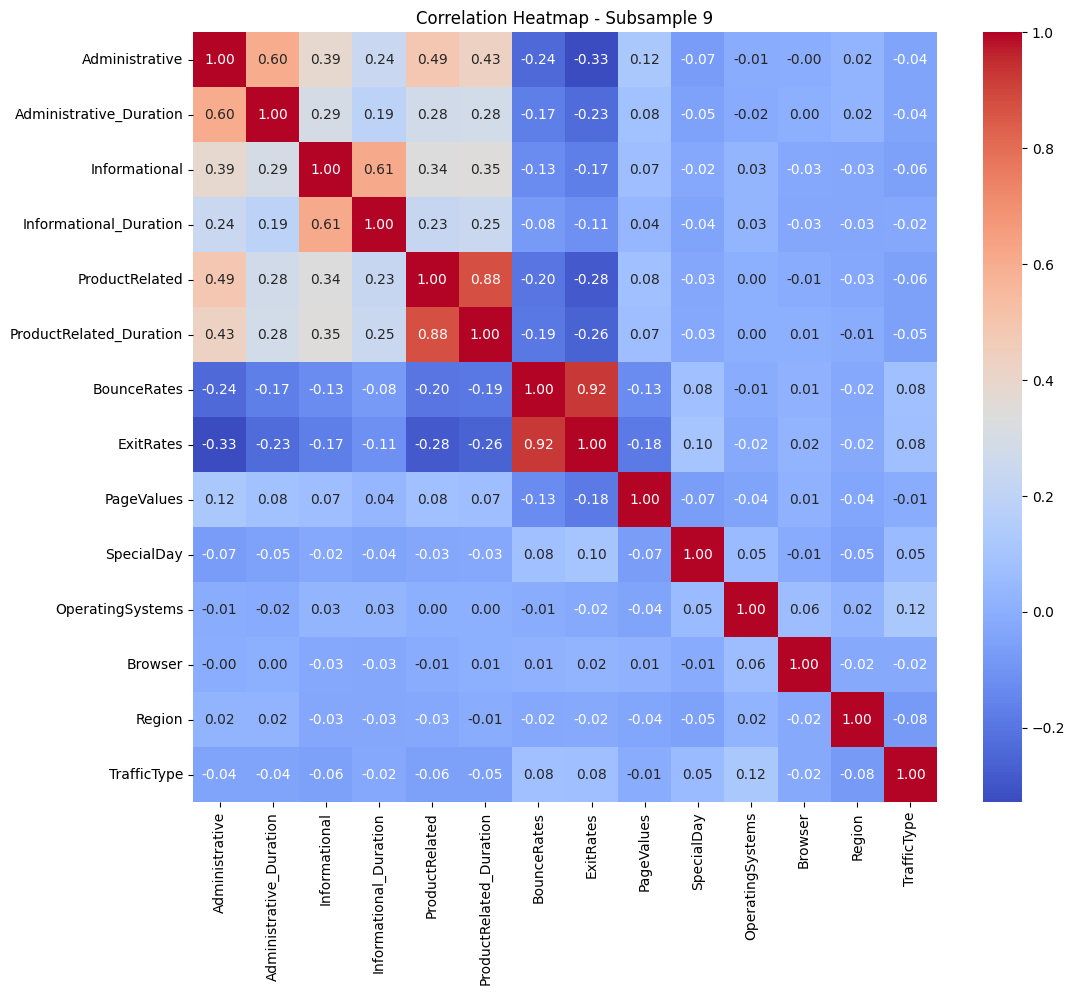

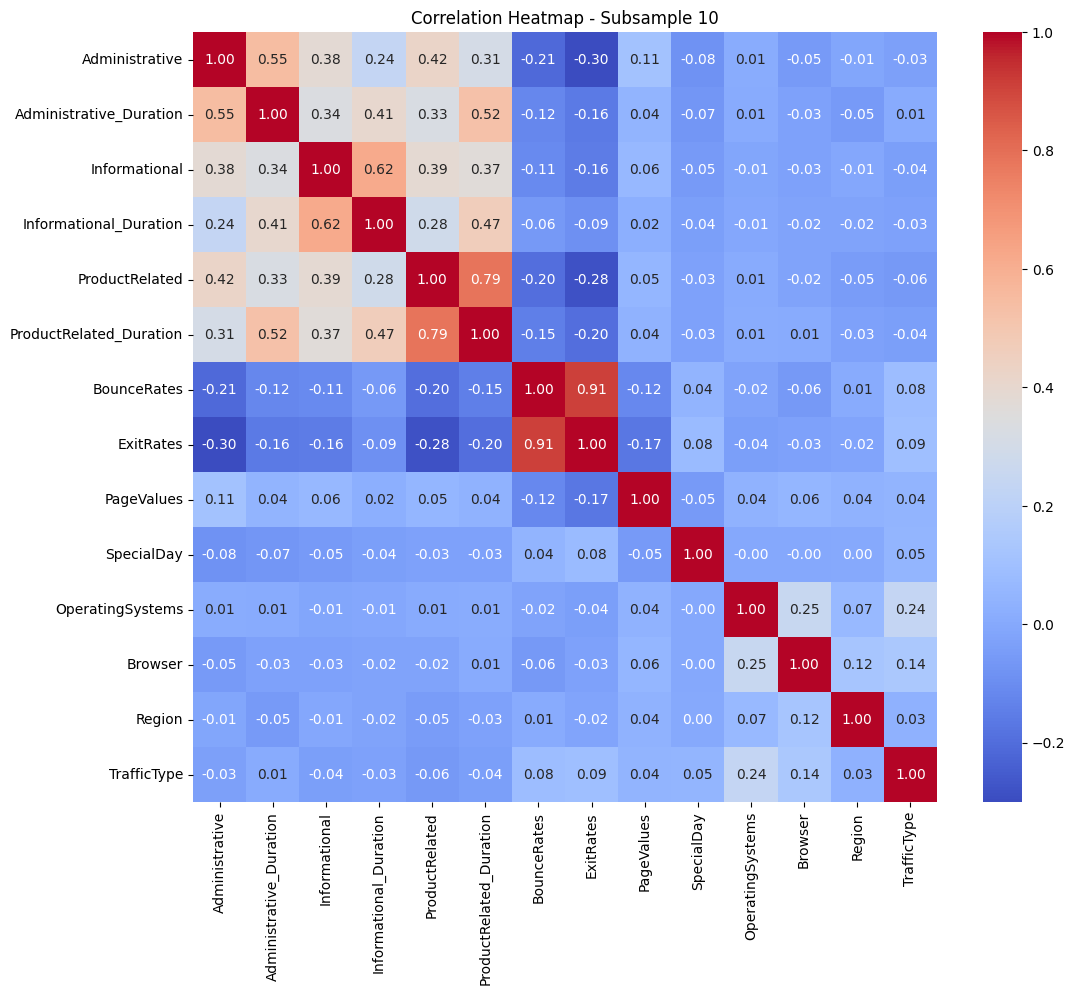

In [2]:
# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(df) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()


**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**
**TASK (Regression): If your problem is a regression problem visually the distribution of your target variabe**

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')


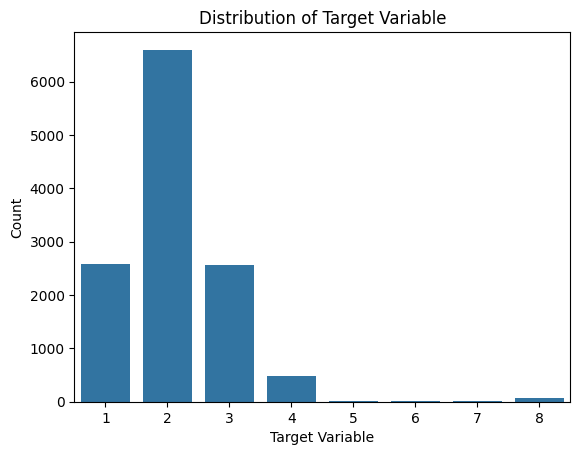

In [3]:
# Task is CLASSIFICATION

import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(df.columns)

# Assuming the target variable column is named 'Region'
sns.countplot(x='OperatingSystems', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

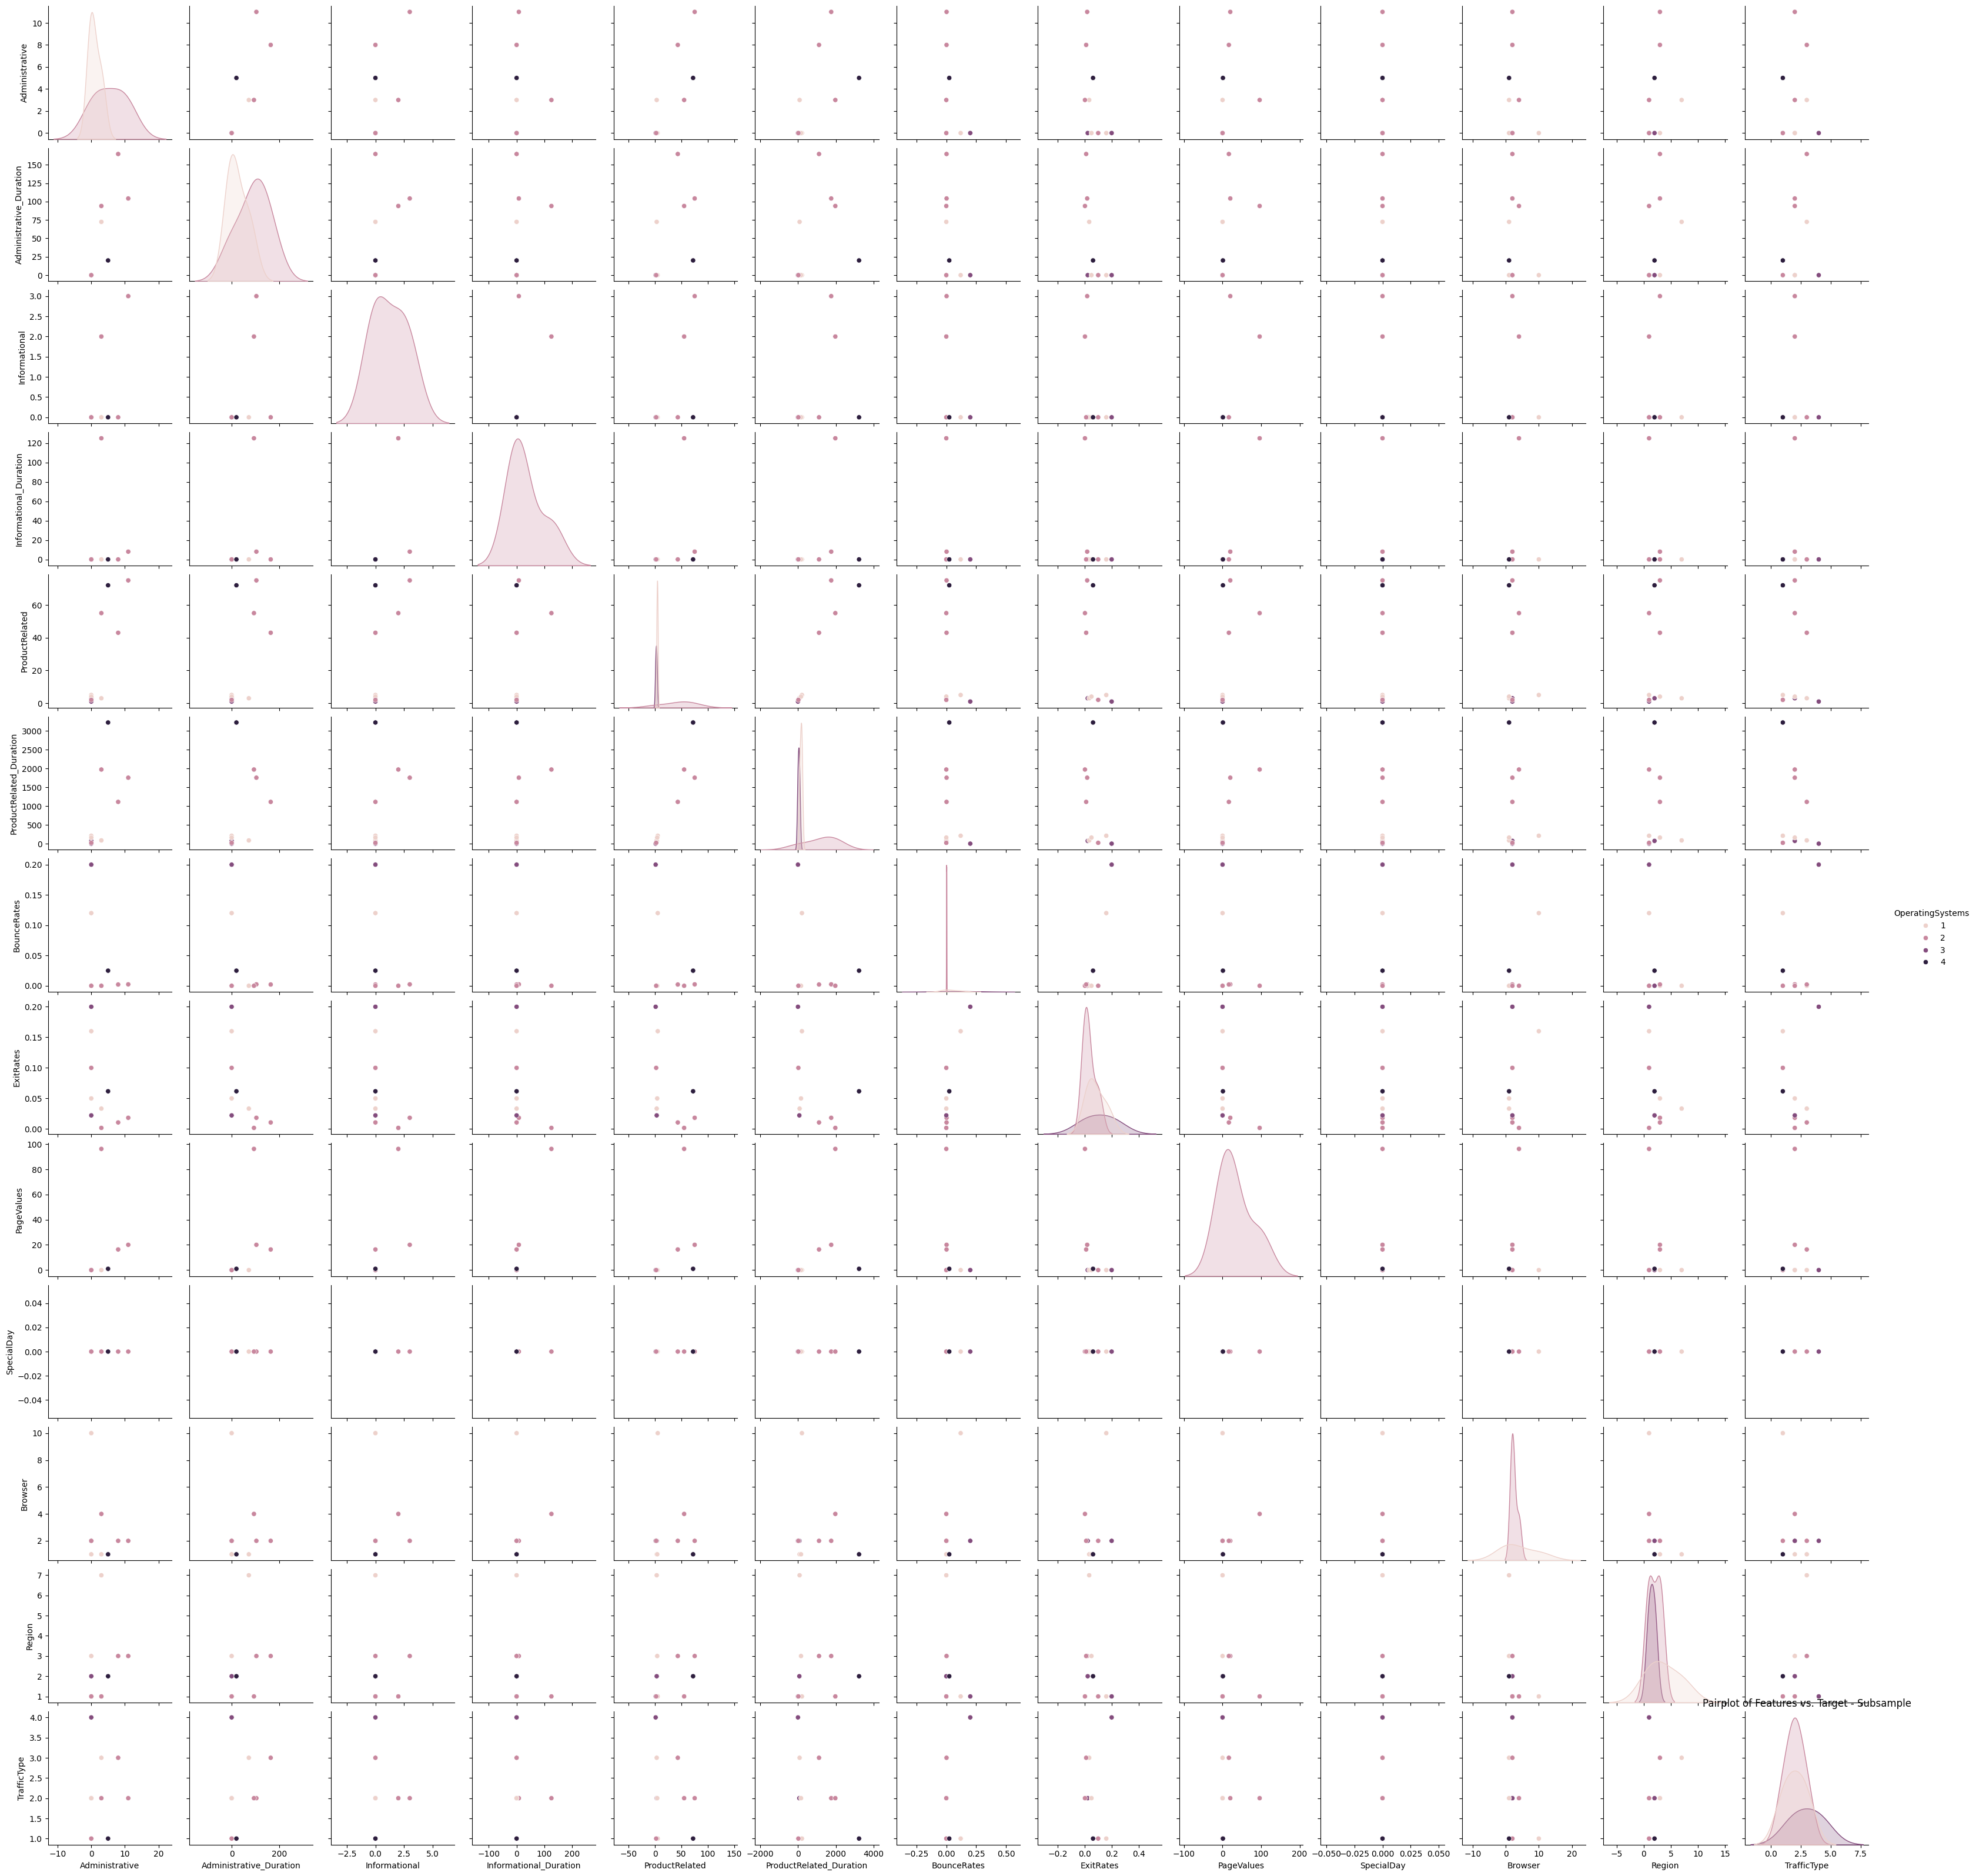

In [4]:
# Define the size of the subsample
subsample_size = 10

# Create a random generator
rng = np.random.default_rng()

# Randomly select rows for the subsample
subsample_indices = rng.choice(df.index, size=subsample_size, replace=False)

# Extract the subsample from the dataset
subsample = df.loc[subsample_indices]

# Create pairplot
sns.pairplot(subsample, hue='OperatingSystems')
plt.title('Pairplot of Features vs. Target - Subsample')
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

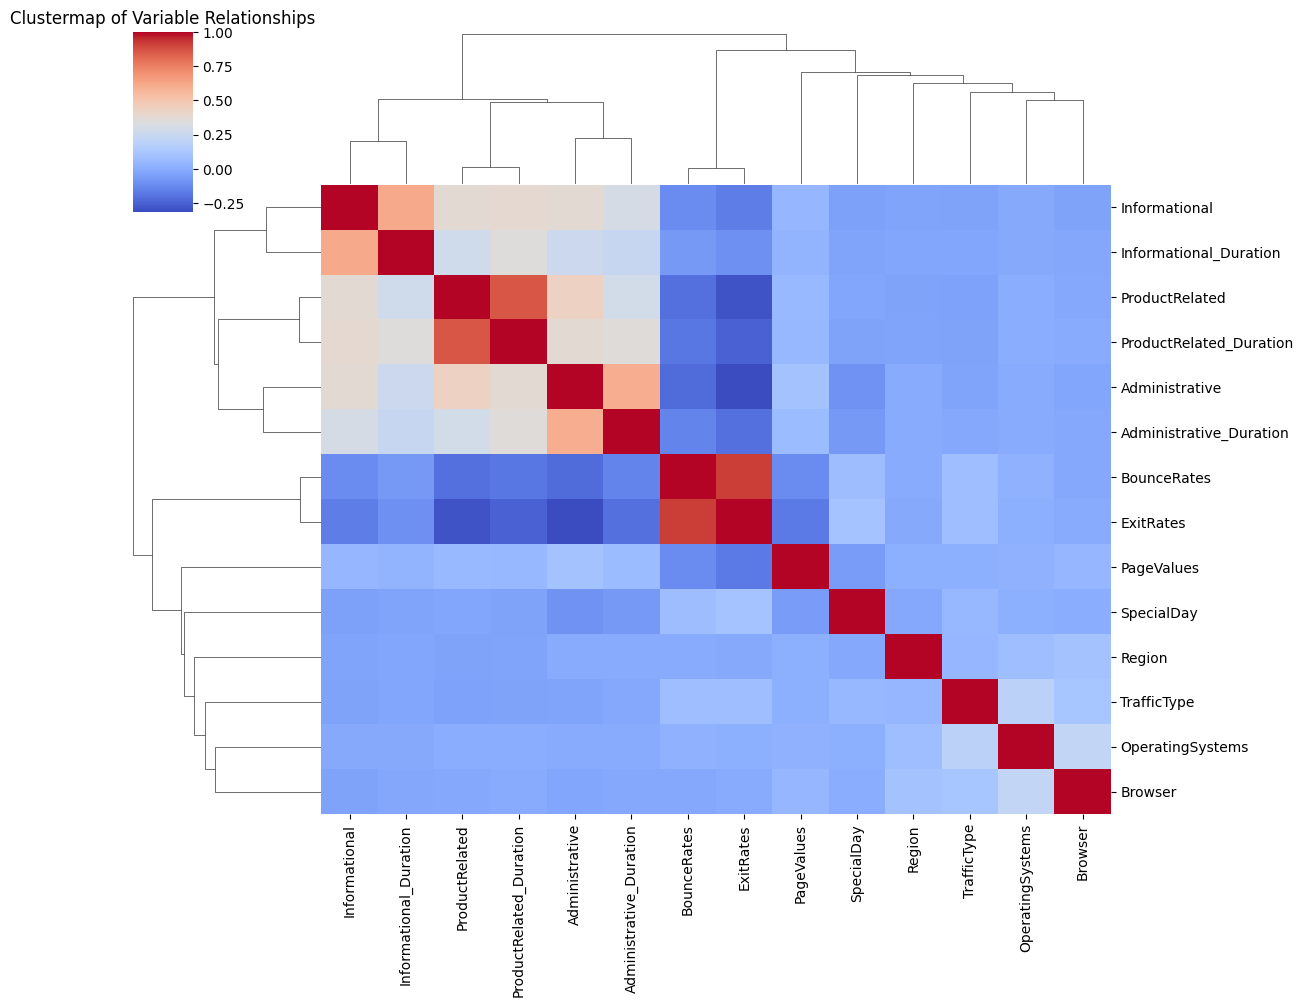

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the clustermap
sns.clustermap(df.corr(), cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare the Data
target_column = 'OperatingSystems'

# Extract features (X) and target (y)
y = df[target_column]
X = df.drop('OperatingSystems', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a Baseline SVM Model
svm_baseline = SVC()
svm_baseline.fit(X, y)
baseline_predictions = svm_baseline.predict(X)

# Evaluate baseline model
print("Baseline SVM Model Performance:")
print("Accuracy:", accuracy_score(y, baseline_predictions))
print("Classification Report:\n", classification_report(y, baseline_predictions))
print("Confusion Matrix:\n", confusion_matrix(y, baseline_predictions))

Baseline SVM Model Performance:
Accuracy: 0.535360908353609
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2585
           2       0.54      1.00      0.70      6601
           3       0.00      0.00      0.00      2555
           4       0.00      0.00      0.00       478
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        79

    accuracy                           0.54     12330
   macro avg       0.07      0.12      0.09     12330
weighted avg       0.29      0.54      0.37     12330

Confusion Matrix:
 [[   0 2585    0    0    0    0    0    0]
 [   0 6601    0    0    0    0    0    0]
 [   0 2555    0    0    0    0    0    0]
 [   0  478    0    0    0    0    0    0]
 [   0    6    0    0    0    0    0    0]
 [   0   19    0    0    0    0

In [7]:
# 3. Tune Hyperparameters using GridSearch
param_grid = {'C': [0.01,0.1,1], 'kernel': ['rbf', 'linear']}
svm_grid_search = GridSearchCV(SVC(), param_grid)
svm_grid_search.fit(X, y)

In [ ]:

# Best parameters found
print("Best parameters:", svm_grid_search.best_params_)

# 4. Evaluate Model Performance
grid_predictions = svm_grid_search.predict(X)

print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y, grid_predictions))
print("Classification Report:\n", classification_report(y, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y, grid_predictions))